In [20]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


In [21]:
input_dir = "C:\\Users\\praka\\OneDrive\\Desktop\\Machine Learning\\AyushImage"   # folder with your 5 images
output_dir = "C:\\Users\\praka\\OneDrive\\Desktop\\Machine Learning\\AyushImageOutput"     # Output folder for augumented images

In [22]:
os.makedirs(output_dir, exist_ok=True)

In [23]:
# Define your data augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

In [24]:
# How many images per original image you want
n_augment = 50

In [ ]:
# for filename in os.listdir(input_dir):
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
#         img_path = os.path.join(input_dir, filename)
#         img = load_img(img_path)  # Load image
#         x = img_to_array(img)     # Convert to numpy array
#         x = np.expand_dims(x, axis=0)

#         # Generate and save augmented images
#         i = 0
#         for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir,
#                                   save_prefix=filename.split('.')[0],
#                                   save_format='jpeg'):
#             i += 1
#             if i >= n_augment:
#                 break

In [42]:
import pathlib
data_dir = pathlib.Path("C:/Users/praka/OneDrive/Desktop/Machine Learning/AyushImageOutput")


In [43]:
all_images = list(data_dir.glob('**/*'))


In [30]:
len(all_images)

546

In [31]:
all_images[0]

WindowsPath('C:/Users/praka/OneDrive/Desktop/Machine Learning/AyushImageOutput/2_0_1119.jpeg')

In [32]:
import PIL.Image


temp=PIL.Image.open((all_images[98]))

In [34]:
photo=np.array(temp)

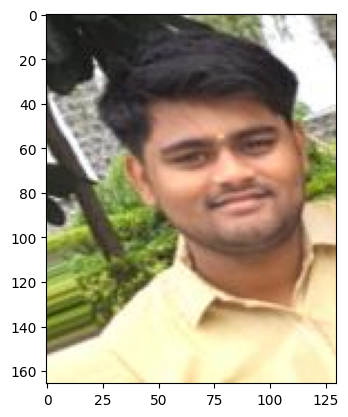

In [36]:
import matplotlib.pyplot as plt
plt.imshow(photo)

In [37]:
other_1_dir = "C:\\Users\\praka\\OneDrive\\Desktop\\Machine Learning\\AyushImage"   # folder with your 5 images
other_2_dir = "C:\\Users\\praka\\OneDrive\\Desktop\\Machine Learning\\output"  

In [38]:
os.makedirs(other_2_dir, exist_ok=True)
# Define your data augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)
n_augment = 90

In [ ]:
# for filename in os.listdir(other_1_dir):
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
#         img_path = os.path.join(other_1_dir, filename)
#         img = load_img(img_path)  # Load image
#         x = img_to_array(img)     # Convert to numpy array
#         x = np.expand_dims(x, axis=0)

#         # Generate and save augmented images
#         i = 0
#         for batch in datagen.flow(x, batch_size=1, save_to_dir=other_2_dir,
#                                   save_prefix=filename.split('.')[0],
#                                   save_format='jpeg'):
#             i += 1
#             if i >= n_augment:
#                 break

In [41]:
import pathlib
data_dir2 = pathlib.Path("C:/Users/praka/OneDrive/Desktop/Machine Learning/output")

In [52]:
all_images2 = list(data_dir2.glob('**/*'))

In [53]:
len(all_images2)

1075

In [54]:
temp=PIL.Image.open((all_images2[98]))

In [55]:
photo=np.array(temp)

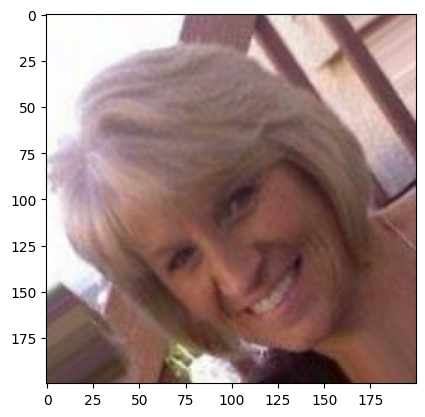

In [56]:
plt.imshow(photo)

In [58]:
ayush_dict={
    1:list(data_dir.glob('**/*'))
}

In [60]:
other_dict={
  0:list(data_dir2.glob('**/*'))
}

In [61]:
Ayush=[]
y_Ayush=[]
import cv2
for label,images in ayush_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        Ayush.append(resized_img)
        y_Ayush.append(1)

In [70]:
d=np.array(Ayush[333])

In [71]:
d.shape

(180, 180, 3)

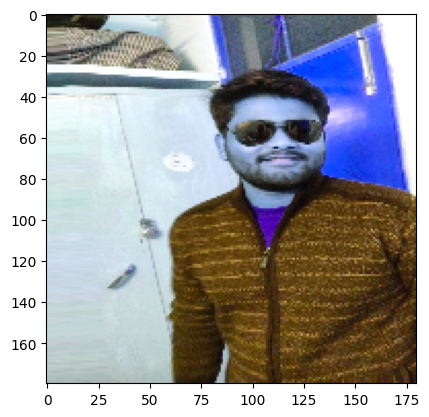

In [72]:
plt.imshow(d)

In [73]:
other=[]
y_other=[]
import cv2
for label,images in other_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        other.append(resized_img)
        y_Ayush.append(0)

In [74]:
d=np.array(other[333])

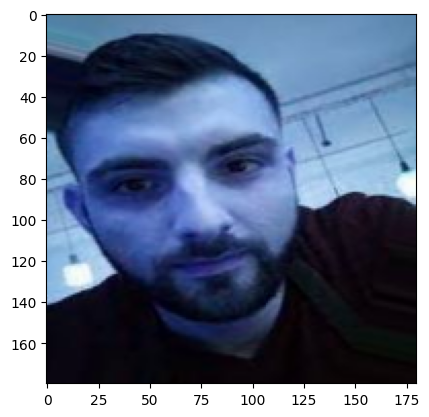

In [75]:
plt.imshow(d)

In [76]:
combine=Ayush+other

In [77]:
combine_y=y_Ayush+y_other

0

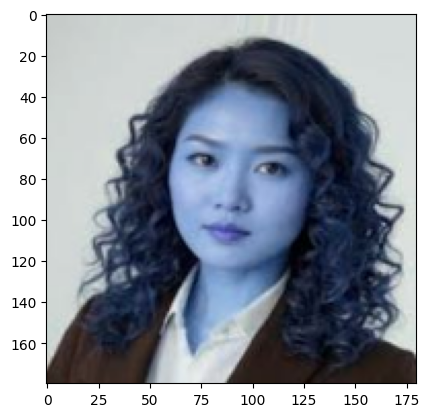

In [ ]:
d=np.array(combine[789])
plt.imshow(d)


In [81]:
combine_y[789]

0

In [82]:
x=np.array(combine)
y=np.array(combine_y)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [85]:
x_train=X_train/255
x_test=X_test/255

In [ ]:
num_classes = 2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
model.fit(x_train, y_train, epochs=20)  

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.6797 - loss: 0.6807
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.9576 - loss: 0.1146
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.9994 - loss: 0.0071
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 1.0000 - loss: 4.2797e-04
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 1.0000 - loss: 1.0556e-04
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 1.0000 - loss: 6.8141e-05
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 1.0000 - loss: 4.2774e-05
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 1.0000 - loss: 3.1202e-05
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 1.0000 - loss: 2.3798e-05
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 1.0000 - loss: 2.0975e-05
Epoch 12/20
41/41 ━━━━━

In [89]:
model.evaluate(x_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 5.1004e-04


[0.0005848589935339987, 1.0]

In [90]:
prediction=model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [93]:
def giveMeLAbel(x):
    return np.argmax(x)


In [110]:
print(giveMeLAbel(prediction[10]))

0


In [111]:
y_test[10]

np.int64(0)

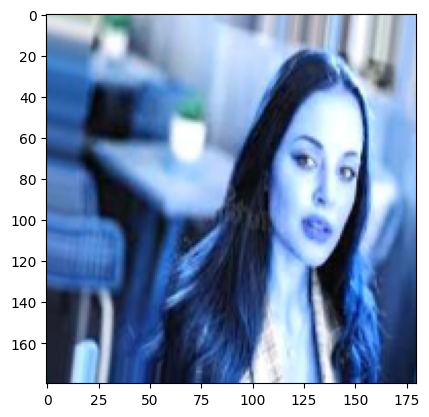

In [113]:
plt.imshow(x_test[10])